<a href="https://colab.research.google.com/github/violet417/violet417/blob/main/1%EA%B8%B0%EC%B4%88_34_%EC%83%81%EA%B4%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 상관분석
- 두 변수 간에 어떤 선형적 관계를 가지는지 분석하는 기법으로 상관계수를 이용하여 측정
- 상관계수(r) = x와 y가 함께 변하는 정도 / x와 y가 각각 변하는 정도 | r = -1~1 사이  
※ ±0.3: 상관관계를 보인다 | ±0.5 이상: 강한 상관관계를 보인다
- 예) 온도가 높아질수록 아이스크림 판매량은 증가한다. 
온도가 높아질수록 패딩 판매량은 감소한다. 

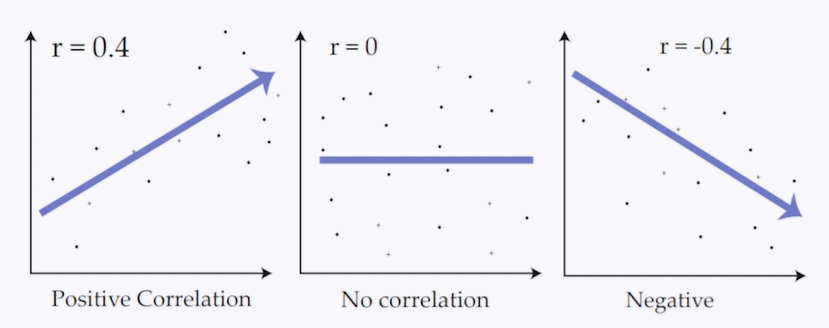


#### 피어슨 상관계수
- 공분산 / (X표준편차)(Y표준편차) 
<br>


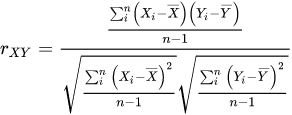


- import scipy.stats as stats
- stats.pearsonr(X, Y) <br>
∇ [상관계수, p-value]
- p-value: 상관관계가 없다에 대한 검정 결과를 확률로 표현 (상관관계가 없을 확률)

In [ ]:
# seaborn의 heatmap 함수를 통한 상관계수 그래프 그리기
from sklearn.datasets import load_diabetes    # 당뇨병 데이터
import seaborn as sns    # 데이터분석 연습용
import pandas as pd      # 데이터분석
import scipy.stats as stats    # 상관계수를 분석하기 위해서

In [ ]:
diabetes = load_diabetes()    # dic 형태로 제공
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
data, target = diabetes['data'], diabetes['target']

In [ ]:
data.shape    # 442개의 데이터, 10개의 특성

(442, 10)

In [ ]:
target    # 당뇨병 진행도

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:
# data를 데이터프레임으로 만들기 | 열은 'feature_names'을 가져오면 특성들의 이름을 알 수 있다. 
df = pd.DataFrame(data, columns = diabetes['feature_names'])
df['target'] = diabetes['target']    # df에 target열 추가하기
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [ ]:
# 나이와 당뇨병 간에 상관관계가 있는지?
X = df['age']
Y = df['target']

stats.pearsonr(X,Y)    # 상관계수, p-value 
# 상관계수 0.187 낮은 상관관계가 있다. | 상관관계가 없을 확률 7*10의 -5승으로 0에 가깝다.

(0.1878887507189199, 7.055686149112959e-05)

In [ ]:
X1 = df['sex']
Y1 = df['target']

stats.pearsonr(X1, Y1)
# 상관계수 0.04 상관관계가 없다. | p-value 값이 0.05보다 높기 때문에 믿을 수 없다. 
# p-value 값이 0.05보다 작으면 상관관계가 있다로 해석

(0.043061998451605396, 0.3664292946517888)

In [ ]:
X2 = df['bmi']
Y2 = df['target']

stats.pearsonr(X2, Y2)
# 상관계수 0.586 강한 상관관계가 있다. | p-value 값이 3*10의 -42승으로 거의 0에 가깝다. 

(0.5864501344746887, 3.4660064451654114e-42)

In [ ]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


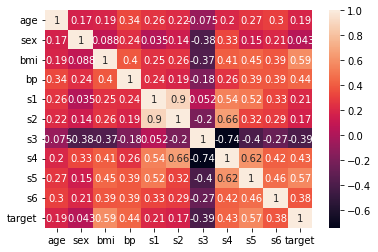

In [ ]:
sns.heatmap(df.corr(), annot=True)    # annot=True: 수치를 볼 수 있다. 

In [ ]:
# 색깔이 밝아질수록 높은 상관관계가 보인다. 